# snakeviz is a good tool for measuring time

In [7]:
#%matplotlib widget
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 3)
import  general.utils as utils
import result_analyse.resultloader
import result_analyse.visualisation as vs

from ipywidgets import interact, interactive, fixed, interact_manual

@interact
def result_selector(file=result_analyse.resultloader.get_runs()):
    if(file==None):return
    print('Analysing ',file)
    run_info,dataset,evalres=utils.loadState(file)
    for i in range(len(evalres)):
        quality=evalres[i].quality
        print('Evalution quality fold=%d is %s' % (i, quality))
        
    #vs.visualize(dataset)
    print(len(dataset.sensor_events))
    vs.plot_per_act(dataset,{'test':evalres})
    vs.plot_CM(dataset,evalres)
    for i in range(len(evalres)):
        # vs.my_result_analyse(evalres[i].real_events,evalres[i].pred_events)
        vs.plotJoinAct(dataset,evalres[i].real_events,evalres[i].pred_events)




Populating the interactive namespace from numpy and matplotlib


interactive(children=(Dropdown(description='file', options=(('200418_19-32-37-Home1', '200418_19-32-37-Home1')…

200207_10-22-20-A4H
200207_10-22-15-A4H
200207_10-00-01-Home1
['SimplePreprocessing', 'Probabilistic', 'CookActivityFetcher', 'SimpleFeatureExtraction', 'SimpleKeras', 'SimpleCombiner', 'Accuracy', 'Accuracy', '']
200207_09-59-32-Home1
['SimplePreprocessing', 'Probabilistic', 'CookActivityFetcher', 'SimpleFeatureExtraction', 'SimpleKeras', 'SimpleCombiner', 'Accuracy', 'Accuracy', '']
200207_09-49-24-Home2
200207_09-49-23-Home2
200207_09-17-30-VanKasteren
200207_09-16-53-VanKasteren
200207_08-52-15-A4H
200207_08-34-26-Home1
['SimplePreprocessing', 'Probabilistic', 'CookActivityFetcher', 'SimpleFeatureExtraction', 'SimpleKeras', 'SimpleCombiner', 'Accuracy', 'Accuracy', '']
200207_08-27-29-Home2
200207_08-07-21-VanKasteren
200207_04-14-21-Home1
File 200207_04-14-21-Home1 can not import error 
200207_04-07-21-Home2
200207_03-55-17-A4H
200207_03-54-31-A4H
200207_03-50-31-Home1


pickle data was truncated
Traceback (most recent call last):
  File "<ipython-input-2-e5fd02a4633b>", line 12, in get_my_eval
    res=utils.loadState(item)
  File "/workspace/UnifiedAR/general/utils.py", line 153, in loadState
    return pickle.load(f)
_pickle.UnpicklingError: pickle data was truncated


['SimplePreprocessing', 'FixedSlidingWindow', 'CookActivityFetcher', 'SimpleFeatureExtraction', 'SimpleKeras', 'SimpleCombiner', 'Accuracy', 'Accuracy', '']
200207_03-47-50-Home2
200207_03-45-32-VanKasteren
200207_03-45-08-Home1
['SimplePreprocessing', 'FixedEventWindow', 'CookActivityFetcher', 'SimpleFeatureExtraction', 'SimpleKeras', 'SimpleCombiner', 'Accuracy', 'Accuracy', '']
200207_03-44-08-VanKasteren
200207_03-43-36-Home2
200207_03-41-42-VanKasteren
200207_03-39-31-A4H
200207_03-34-24-Home1
['SimplePreprocessing', 'FixedEventWindow', 'CookActivityFetcher', 'SimpleFeatureExtraction', 'SimpleKeras', 'SimpleCombiner', 'Accuracy', 'Accuracy', '']
200207_03-33-30-Home2
200207_03-31-39-VanKasteren
200207_03-31-03-A4H
200207_03-13-35-Home1
['SimplePreprocessing', 'Probabilistic', 'CookActivityFetcher', 'SimpleFeatureExtraction', 'SimpleKeras', 'SimpleCombiner', 'Accuracy', 'Accuracy', '']
200207_03-06-43-Home2
200207_02-58-02-A4H
200207_02-55-40-A4H
200207_02-51-13-Home1
['SimplePrepr

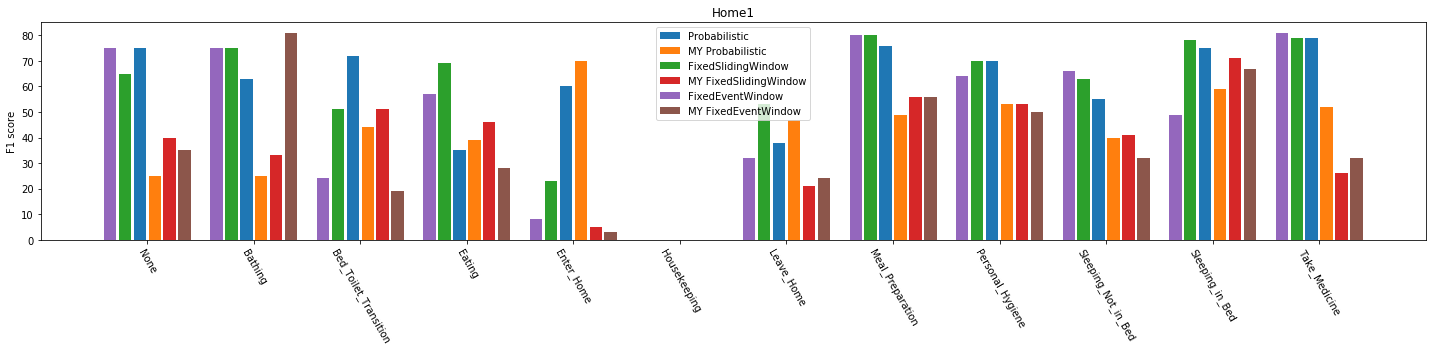

In [2]:
def get_my_eval(data_dscr='Home1',reqinfo=['SimpleKeras','SimpleFeatureExtraction']):
    import os
    import pandas as pd
    list=os.listdir('save_data/')
    list.sort(key=lambda f:os.path.getmtime('save_data/'+f),reverse=True)
    result={}
    dataset=None
    for item in list:
        print(item)
        if not (data_dscr in item):continue
        try:
            res=utils.loadState(item)
            if(len(res)!=3):
                #raise Error
                logger.warn('File %s can not import'%item)
                continue
            [run_info,datasetdscr,evalres]=res
            name=evalres[0].shortrunname.split('_')
            print(name)
            name=name[1]
            if not(datasetdscr.data_dscr==data_dscr):continue
            
            for r in reqinfo:
                if not(r in evalres[0].shortrunname):
                    #print(r)
                    continue
#             tbl=getRunTable(run_info,datasetdscr,evalres)
            
            
            result[name]=evalres
            dataset=datasetdscr
        except Exception as e:
            print('File %s can not import error '%item)
            import sys
            import traceback
            print(e, file=sys.stderr)
            traceback.print_exc()

    return dataset,result


dataset,myevalres=get_my_eval()
vs.plot_pre_act(dataset,myevalres)